In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("../../../../../Data/Housing_Data.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [24]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

# Imputation

In [25]:
df_imp = df.copy()
df_imp['FireplaceQu'][df_imp['FireplaceQu'].isnull()] = df_imp['FireplaceQu'].dropna().sample( df['FireplaceQu'].isnull().sum() ).values 
df_imp['GarageQual'][df_imp['GarageQual'].isnull()] = df_imp['GarageQual'].dropna().sample( df['GarageQual'].isnull().sum() ).values 

df_imp.isnull().sum()

C:\Users\Jehan\AppData\Local\Temp\ipykernel_7240\1433282590.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_imp['FireplaceQu'][df_imp['FireplaceQu'].isnull()] = df_imp['FireplaceQu'].dropna().sample( df['FireplaceQu'].isnull().sum() )

FireplaceQu    0
GarageQual     0
SalePrice      0
dtype: int64

# Check Categorical Data's Ratio

In [33]:
check_df = pd.DataFrame([])

check_df['FireplaceQu'] = df['FireplaceQu']
check_df['FireplaceQu_imp'] = df['FireplaceQu']
check_df['FireplaceQu_imp'][check_df['FireplaceQu_imp'].isnull()] = check_df['FireplaceQu_imp'].dropna().sample( check_df['FireplaceQu_imp'].isnull().sum() ).values

check_df['GarageQual'] = df['GarageQual']
check_df['GarageQual_imp'] = df['GarageQual']
check_df['GarageQual_imp'][check_df['GarageQual_imp'].isnull()] = check_df['GarageQual_imp'].dropna().sample( check_df['GarageQual_imp'].isnull().sum() ).values

check_df

C:\Users\Jehan\AppData\Local\Temp\ipykernel_7240\3486171625.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  check_df['FireplaceQu_imp'][check_df['FireplaceQu_imp'].isnull()] = check_df['FireplaceQu_imp'].dropna().sample( check_df['Firepl

,FireplaceQu,FireplaceQu_imp,GarageQual,GarageQual_imp
0,NaN,TA,TA,TA
1,TA,TA,TA,TA
2,TA,TA,TA,TA
3,Gd,Gd,TA,TA
4,TA,TA,TA,TA
...,...,...,...,...
1455,TA,TA,TA,TA
1456,TA,TA,TA,TA
1457,Gd,Gd,TA,TA
1458,NaN,TA,TA,TA


In [36]:
check_df['FireplaceQu'].value_counts() / len(check_df['FireplaceQu'].dropna())

FireplaceQu
Gd    0.493506
TA    0.406494
Fa    0.042857
Ex    0.031169
Po    0.025974
Name: count, dtype: float64

In [40]:
check_ratio = pd.concat([
    check_df['FireplaceQu'].value_counts() / len(check_df['FireplaceQu'].dropna()),
    check_df['FireplaceQu_imp'].value_counts() / len(check_df['FireplaceQu_imp'].dropna()),
],axis=1)
check_ratio.columns = ['Before Imputation ratio','After Imputation ratio']
check_ratio

,Before Imputation ratio,After Imputation ratio
Gd,0.493506,0.495205
TA,0.406494,0.408904
Fa,0.042857,0.042466
Ex,0.031169,0.029452
Po,0.025974,0.023973


In [41]:
check_ratio = pd.concat([
    check_df['GarageQual'].value_counts() / len(check_df['GarageQual'].dropna()),
    check_df['GarageQual_imp'].value_counts() / len(check_df['GarageQual_imp'].dropna()),
],axis=1)
check_ratio.columns = ['Before Imputation ratio','After Imputation ratio']
check_ratio

,Before Imputation ratio,After Imputation ratio
TA,0.950689,0.949315
Fa,0.034808,0.034932
Gd,0.010152,0.010274
Ex,0.002175,0.002740
Po,0.002175,0.002740


# Bar plot

Text(0.5, 1.0, 'After Imputation')

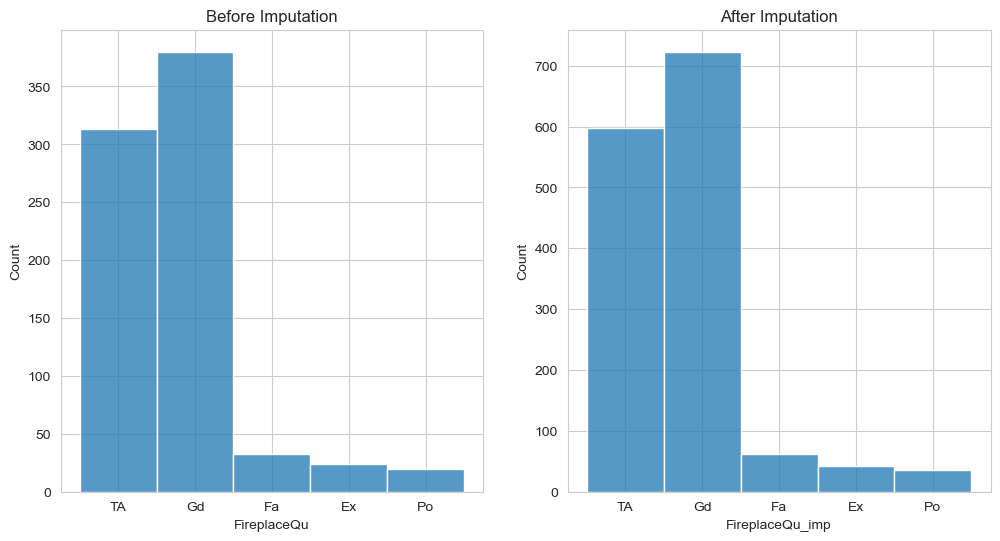

In [50]:
fig,axis = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(data=check_df,x='FireplaceQu',ax=axis[0])
axis[0].set_title("Before Imputation")
sns.histplot(data=check_df,x='FireplaceQu_imp',ax=axis[1])
axis[1].set_title("After Imputation")

Text(0.5, 1.0, 'After Imputation')

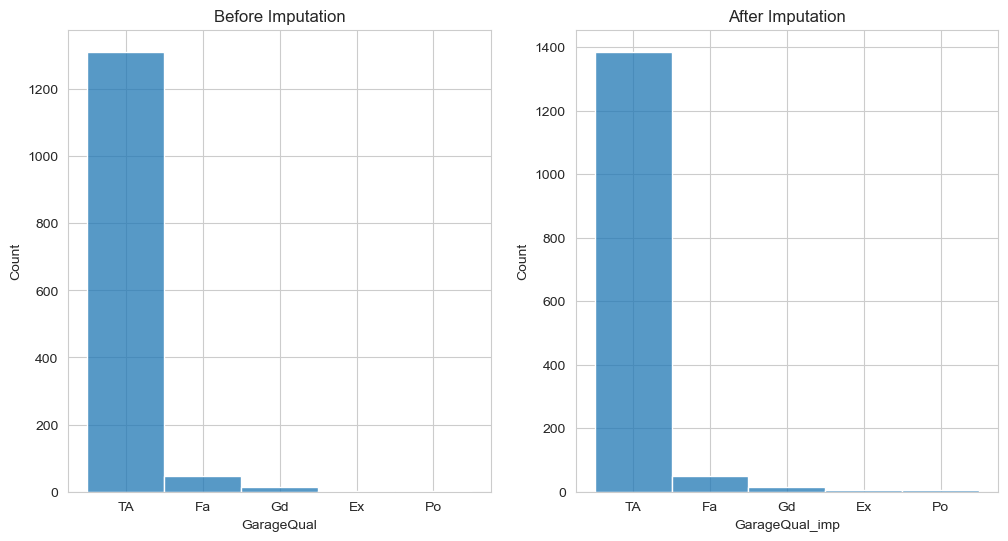

In [51]:
fig,axis = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(data=check_df,x='GarageQual',ax=axis[0])
axis[0].set_title("Before Imputation")
sns.histplot(data=check_df,x='GarageQual_imp',ax=axis[1])
axis[1].set_title("After Imputation")